In [1]:
from salishsea_tools import nc_tools, data_tools, tidetools, visualisations, viz_tools
import matplotlib.pyplot as plt
from collections import OrderedDict

%matplotlib inline

In [2]:
timerange = ['2016 Jul 1 00:00', '2016 Jul 2 00:00']

In [3]:
NEMO = nc_tools.load_NEMO_from_erddap(timerange)
GEM  = nc_tools.load_ERDDAP_GEM( timerange)
DRIFTERS = data_tools.load_drifters()

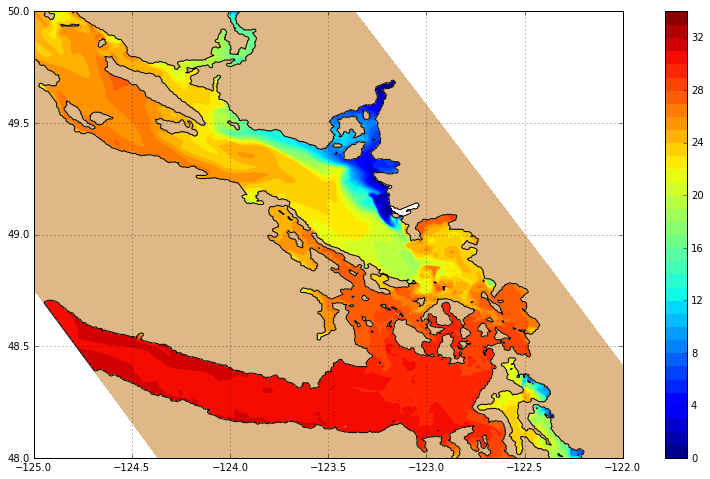

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    
# Coastline
viz_tools.plot_land_mask(ax, NEMO, coords='map', color='burlywood')
viz_tools.plot_coastline(ax, NEMO, coords='map')

# Model Plots at t=0
C_NEMO = visualisations.plot_tracers( timerange[0], ax, 'salinity', NEMO)
fig.colorbar(C_NEMO)

# Prettying
viz_tools.set_aspect(ax)
ax.set_xlim([-125, -122])
ax.set_ylim([48, 50])
ax.grid()

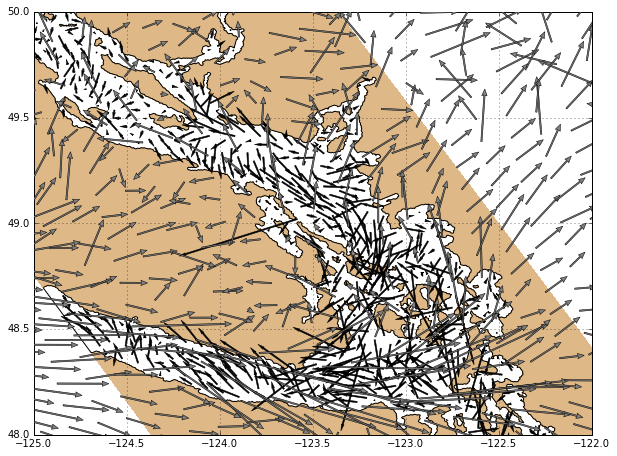

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
# Coastline
viz_tools.plot_land_mask(ax, NEMO, coords='map', color='burlywood')
viz_tools.plot_coastline(ax, NEMO, coords='map')

# Model Plots at t=0
Q_NEMO = visualisations.plot_velocity(timerange[0], ax, NEMO, spacing=10, headwidth=2)
Q_GEM  = visualisations.plot_velocity(timerange[0], ax, GEM, model='GEM', color='gray', scale=40, headwidth=4)

# Prettying
viz_tools.set_aspect(ax)
ax.set_xlim([-125, -122])
ax.set_ylim([48, 50])
ax.grid()

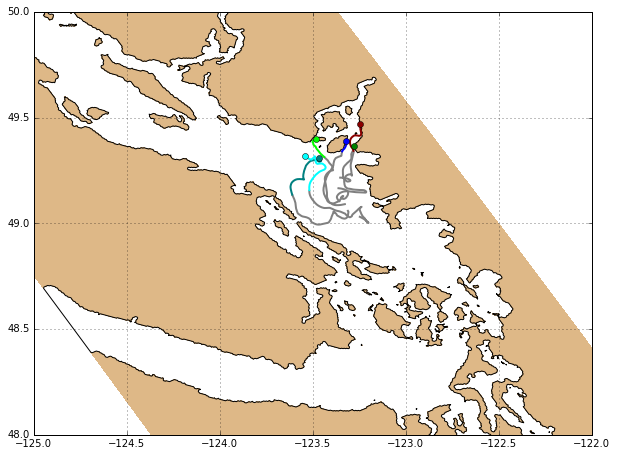

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

DRIFT_OBJS = OrderedDict()

# Define color palette
palette = ['blue', 'teal', 'cyan', 'green', 'lime', 'darkred', 'red',
           'orange', 'magenta', 'purple', 'black', 'dimgray', 'saddlebrown']
    
# Coastline
viz_tools.plot_land_mask(ax, NEMO, coords='map', color='burlywood')
viz_tools.plot_coastline(ax, NEMO, coords='map')

for index, drifter in enumerate(DRIFTERS['deployment7'].items()):
    DRIFT_OBJS[drifter[0]] = visualisations.plot_drifters(timerange[0], ax, drifter[1], color=palette[index])

# Prettying
viz_tools.set_aspect(ax)
ax.set_xlim([-125, -122])
ax.set_ylim([48, 50])
ax.grid()